In [0]:
%tensorflow_version 1.4

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.4`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [0]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import seed
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
from tensorflow import keras
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.keras import backend

from keras.models import Sequential
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
from tensorflow import set_random_seed
seed(10)
set_random_seed(10)

In [0]:
from google.colab import files
uploaded = files.upload()

Saving merged_exp_normal.csv to merged_exp_normal.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['merged_exp_normal.csv']))
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,Sds_Armed,Anomaly_Tag
0,622,0.42051,0.73265,6.0160,1.4258,0.22390,0.44638,4.9892,1.3106,1,0
1,623,0.41743,0.72691,6.0102,1.4259,0.21750,0.44326,5.0469,1.3243,1,0
2,624,0.41608,0.72337,6.0093,1.4254,0.21875,0.44661,5.0830,1.3227,1,0
3,625,0.41517,0.72154,6.0002,1.4261,0.23488,0.46345,4.9672,1.3509,1,0
4,626,0.41376,0.71773,5.9814,1.4257,0.25363,0.48208,4.8346,1.3580,1,0


In [0]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df = df.drop(['Sds_Armed'], axis = 1)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Anomaly_Tag
0,0.42051,0.73265,6.0160,1.4258,0.22390,0.44638,4.9892,1.3106,0
1,0.41743,0.72691,6.0102,1.4259,0.21750,0.44326,5.0469,1.3243,0
2,0.41608,0.72337,6.0093,1.4254,0.21875,0.44661,5.0830,1.3227,0
3,0.41517,0.72154,6.0002,1.4261,0.23488,0.46345,4.9672,1.3509,0
4,0.41376,0.71773,5.9814,1.4257,0.25363,0.48208,4.8346,1.3580,0


In [4]:
RANDOM_SEED = 101

X_train, X_test = train_test_split(df, test_size=0.2, random_state = RANDOM_SEED)

X_train = X_train[X_train['Anomaly_Tag'] == 0]
X_train = X_train.drop(['Anomaly_Tag'], axis=1)
y_test  = X_test['Anomaly_Tag']
X_test  = X_test.drop(['Anomaly_Tag'], axis=1)
X_train = X_train.values
X_test  = X_test.values
print('Training data size   :', X_train.shape)
print('Validation data size :', X_test.shape)

NameError: name 'train_test_split' is not defined

In [5]:
X_test.head()

NameError: name 'X_test' is not defined

In [0]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [0]:
df = df.sort_index()
df.head()
print(df)
print(df.shape)

             X1       X2      X3      X4  ...       X6       X7      X8  Anomaly_Tag
0       0.42051  0.73265  6.0160  1.4258  ...  0.44638   4.9892  1.3106            0
1       0.41743  0.72691  6.0102  1.4259  ...  0.44326   5.0469  1.3243            0
2       0.41608  0.72337  6.0093  1.4254  ...  0.44661   5.0830  1.3227            0
3       0.41517  0.72154  6.0002  1.4261  ...  0.46345   4.9672  1.3509            0
4       0.41376  0.71773  5.9814  1.4257  ...  0.48208   4.8346  1.3580            0
...         ...      ...     ...     ...  ...      ...      ...     ...          ...
152351  0.77400  1.70110  7.1742  3.0244  ...  8.21240  21.4700  1.6362            0
152352  0.76942  1.69400  7.0381  2.9757  ...  8.31700  22.1440  1.6047            0
152353  0.76204  1.67450  6.9004  2.9260  ...  8.25700  22.1050  1.5607            0
152354  0.75973  1.66120  6.7681  2.8843  ...  8.12280  21.9780  1.4982            0
152355  0.76065  1.65900  6.7191  2.8671  ...  7.53940  20.7380  

In [0]:
train = df[:121885] # 80% train
test = df[121885:] # 20% test
print('Training dataset:',train.shape)
print('Testing dataset:',test.shape)

Training dataset: (121885, 9)
Testing dataset: (30471, 9)


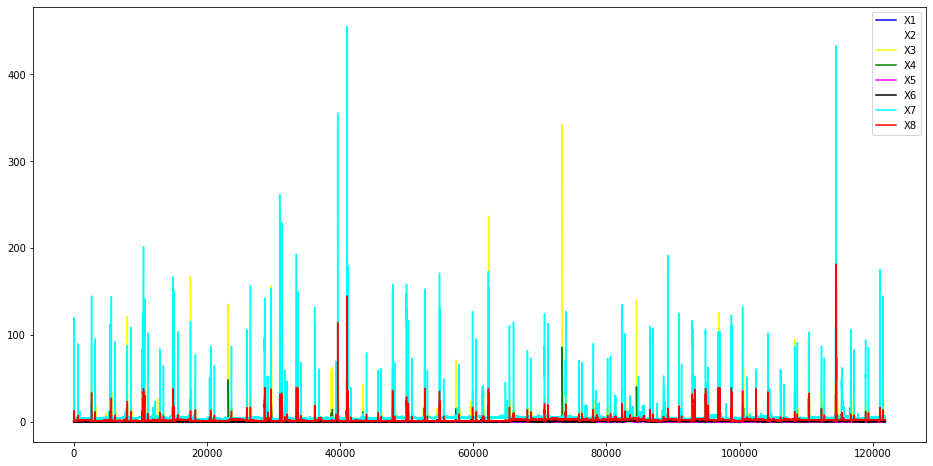

In [0]:
fig, ax = plt.subplots(figsize = (16,8))
ax.plot(train['X1'], label = 'X1', color = 'blue')
ax.plot(train['X2'], label = 'X2', color = 'white')
ax.plot(train['X3'], label = 'X3', color = 'yellow')
ax.plot(train['X4'], label = 'X4', color = 'green')
ax.plot(train['X5'], label = 'X5', color = 'magenta')
ax.plot(train['X6'], label = 'X6', color = 'black')
ax.plot(train['X7'], label = 'X7', color = 'cyan')
ax.plot(train['X8'], label = 'X8', color = 'red')
plt.legend()
plt.show()

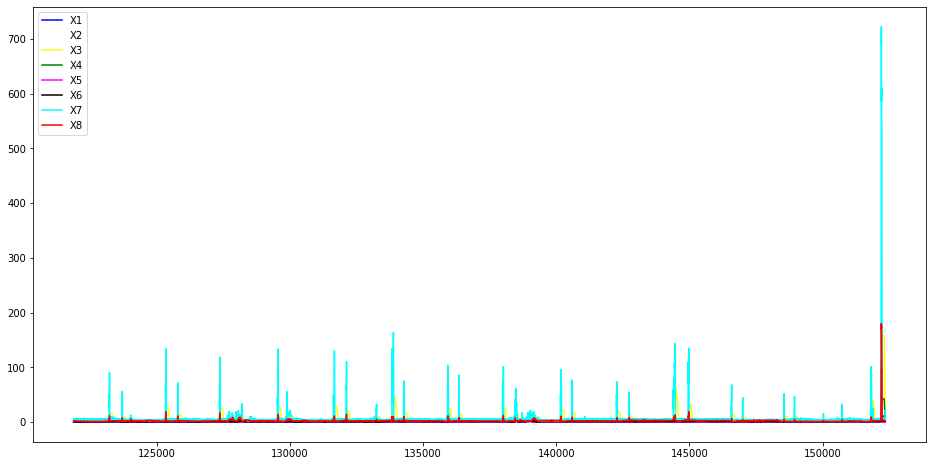

In [0]:
fig, ax = plt.subplots(figsize = (16,8))
ax.plot(test['X1'], label = 'X1', color = 'blue')
ax.plot(test['X2'], label = 'X2', color = 'white')
ax.plot(test['X3'], label = 'X3', color = 'yellow')
ax.plot(test['X4'], label = 'X4', color = 'green')
ax.plot(test['X5'], label = 'X5', color = 'magenta')
ax.plot(test['X6'], label = 'X6', color = 'black')
ax.plot(test['X7'], label = 'X7', color = 'cyan')
ax.plot(test['X8'], label = 'X8', color = 'red')
plt.legend()
plt.show()

In [0]:
#Normalize Data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)
scaler_filename = 'Scaler_Data'
joblib.dump(scaler,scaler_filename)

['Scaler_Data']

In [0]:
#Reshape inputs for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print('Training dataset:', X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print('Test dataset:', X_test.shape)

Training dataset: (121885, 1, 9)
Test dataset: (30471, 1, 9)


In [0]:
#AutoEncoder
def autoencoder_model(X):
  inputs = Input(shape = (X.shape[1], X.shape[2]))
  L1 = LSTM(9,activation='relu',return_sequences=True)(inputs)
  L2 = LSTM(24, activation='relu', return_sequences=False)(L1)
  L3 = RepeatVector(X.shape[1])(L2)
  L4 = LSTM(12, activation='relu', return_sequences=True)(L3)
  L5 = LSTM(2, activation='relu', return_sequences=True)(L4)
  output = TimeDistributed(Dense(X.shape[2]))(L5)
  model = Model(inputs = inputs, outputs = output)
  return model

In [0]:
model = autoencoder_model(X_train)
model.compile(optimizer='adam',loss='mae')
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 1, 9)              0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 1, 9)              684       
_________________________________________________________________
lstm_10 (LSTM)               (None, 24)                3264      
_________________________________________________________________
repeat_vector_3 (RepeatVecto (None, 1, 24)             0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 1, 12)             1776      
_________________________________________________________________
lstm_12 (LSTM)               (None, 1, 2)              120       
_________________________________________________________________
time_distributed_3 (TimeDist (None, 1, 9)              27  

In [0]:
#Fit the model to dataset
history = model.fit(X_train, X_train,epochs=50,validation_split=0.1).history

Train on 109696 samples, validate on 12189 samples
Epoch 1/50
109696/109696 [==============================] - 54s 491us/step - loss: 0.0049 - val_loss: 0.0062
Epoch 2/50
109696/109696 [==============================] - 51s 466us/step - loss: 0.0033 - val_loss: 0.0053
Epoch 3/50
109696/109696 [==============================] - 51s 467us/step - loss: 0.0031 - val_loss: 0.0051
Epoch 4/50
109696/109696 [==============================] - 51s 463us/step - loss: 0.0031 - val_loss: 0.0049
Epoch 5/50
109696/109696 [==============================] - 52s 473us/step - loss: 0.0031 - val_loss: 0.0049
Epoch 6/50
109696/109696 [==============================] - 52s 472us/step - loss: 0.0031 - val_loss: 0.0049
Epoch 7/50
109696/109696 [==============================] - 52s 470us/step - loss: 0.0031 - val_loss: 0.0050
Epoch 8/50
109696/109696 [==============================] - 52s 472us/step - loss: 0.0031 - val_loss: 0.0050
Epoch 9/50
109696/109696 [==============================] - 52s 473us/step - 

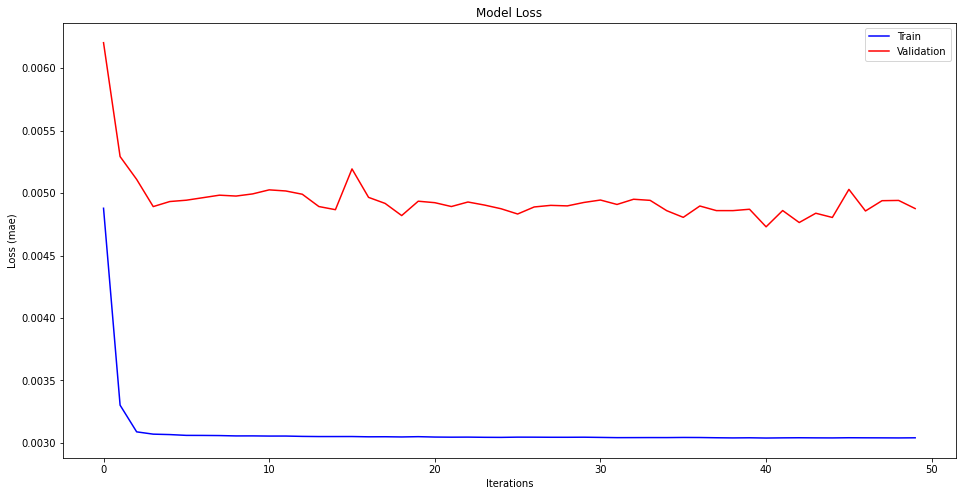

In [0]:
#Plot training loss
fig, ax = plt.subplots(figsize = (16,8))
ax.plot(history['loss'],'b', label = 'Train')
ax.plot(history['val_loss'], 'r', label = 'Validation')
ax.set_title('Model Loss')
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Iterations')
ax.legend()
plt.show()

(-0.025, 0.045)

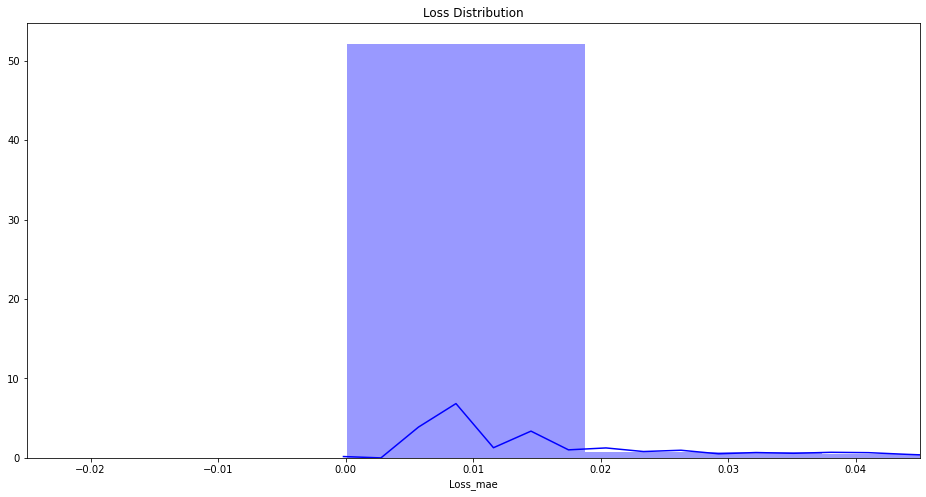

In [0]:
#Prediction
X_predict = model.predict(X_train)
X_predict = X_predict.reshape(X_predict.shape[0], X_predict.shape[2])
X_predict = pd.DataFrame(X_predict, columns= train.columns)
X_predict.index = train.index

score = pd.DataFrame(index=train.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
score['Loss_mae'] = np.mean(np.abs(X_predict - Xtrain), axis=1)
plt.figure(figsize = (16,8))
plt.title('Loss Distribution')
sns.distplot(score['Loss_mae'], bins = 20, kde =True, color ='blue')
plt.xlim([-0.025,0.045])

In [0]:
#Loss on Test dataset
X_predict = model.predict(X_test)
X_predict = X_predict.reshape(X_predict.shape[0], X_predict.shape[2])
X_predict = pd.DataFrame(X_predict, columns= train.columns)
X_predict.index = test.index

score = pd.DataFrame(index=test.index)
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
score['Loss_mae'] = np.mean(np.abs(X_predict - Xtest),axis =1)
score['Threshold'] = 0.015
score['Anomaly'] = score['Loss_mae'] > score['Threshold']
score.head()


,Loss_mae,Threshold,Anomaly
121885,0.000667,0.015,False
121886,0.000698,0.015,False
121887,0.000588,0.015,False
121888,0.000495,0.015,False
121889,0.000654,0.015,False


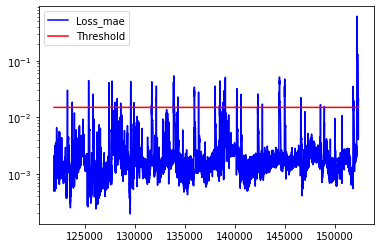

In [0]:
score.plot(logy=True,color = ['blue','red'])